#### Imports

In [20]:
from sklearn.tree import DecisionTreeClassifier
import evaluation
from sklearn.model_selection import train_test_split, cross_val_score, RepeatedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import time
import matplotlib.pyplot as plt
from statistics import mean

#### Retrieve Stored Variables
Standard and Factorized Datasets

In [21]:
%store -r data_levels

#### Variable That Removes Class Variable and ID from Dataset

In [22]:
clean = list(set(list(data_levels)) - set(['default_payment_next_month', 'id']))

#### Seperate Both Datasets into Training and Testing Subsets
70/30 split will be used

In [23]:
fctr_x_train, fctr_x_test, fctr_y_train, fctr_y_test = train_test_split(data_levels[clean], 
                                                                    data_levels['default_payment_next_month'], 
                                                                    test_size=0.3, 
                                                                    random_state=11)

#### Instantiate Decision Tree Model Object

In [24]:
model = DecisionTreeClassifier()

#### Train the Model on the Training Data and Use it to Predict Y Values of Test Set
Include the time taken

In [25]:
start = time.time()
model.fit(X = fctr_x_train,
          y = fctr_y_train)
results = confusion_matrix(y_pred = model.predict(fctr_x_test),
                           y_true = fctr_y_test)
end = time.time()
print(f'The model took {round(end - start, 2)} seconds to train and predict.')

The model took 0.22 seconds to train and predict.


#### Display Confusion Matrix

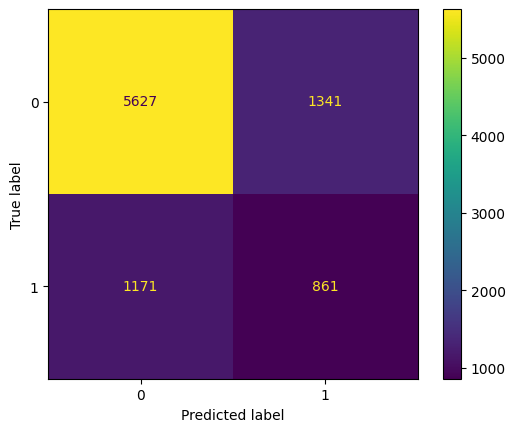

In [26]:
ConfusionMatrixDisplay(results).plot()

#### Evaluate the Model Using Custom Eval Metrics Class

In [27]:
metrics = evaluation.evalMetrics(results)

In [28]:
print(f'The Accuracy of the Model: {round(metrics.accuracy(),3)}')
print(f'The Precision of the Model: {round(metrics.precision(),2)}')
print(f'The Recall of the Model: {round(metrics.recall(),2)}')
print(f'The F-Score of the Model: {round(metrics.fScore(),2)}')
print(f'The Negative Predictive Value  of the Model: {round(metrics.negativePredictiveValue(),2)}')
print(f'The Positive Predicitive Value of the Model: {round(metrics.positivePredictiveValue(),2)}')

The Accuracy of the Model: 0.721
The Precision of the Model: 0.83
The Recall of the Model: 0.81
The F-Score of the Model: 0.82
The Negative Predictive Value  of the Model: 0.39
The Positive Predicitive Value of the Model: 0.83


#### Cross Validate the Model Using Accuracy

In [29]:
start = time.time()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=28)
cv_scores = cross_val_score(model, data_levels[clean], data_levels['default_payment_next_month'], scoring='accuracy', cv=cv)
end = time.time()

#### Evaluate the Results of the Cross-Validation

In [30]:
print(f'Cross Validation took {round(end - start, 2)} seconds and produced an average accuracy of {round(mean(cv_scores),3)}')

Cross Validation took 9.79 seconds and produced an average accuracy of 0.724


#### Analyze Feature Importances and Select the 7 Most Meaningful
Create dict of feature values and their associated label

In [31]:
features = {}
for i in range(len(model.feature_importances_)):
    features[model.feature_importances_[i]] = model.feature_names_in_[i]

Select the 5 best features and return the labels as a list

In [32]:
selected_features = {k: v for k,v in features.items() if k in sorted(features.keys())[::-1][:7]}
selected_features = list(selected_features.values())
selected_features

['pay_amt6', 'age', 'pay_2', 'limit_bal', 'education', 'pay_amt5', 'pay_0']

#### Retrain Model on Selected Features and Evaluate Change in Performance

In [33]:
features_x_train, features_x_test, features_y_train, features_y_test = train_test_split(data_levels[selected_features], 
                                                                    data_levels['default_payment_next_month'], 
                                                                    test_size=0.3, 
                                                                    random_state=14)

#### Reinstantiate Model and Fit/Predict

In [34]:
model = DecisionTreeClassifier()

In [35]:
start = time.time()
model.fit(X = features_x_train,
          y = features_y_train)
results = confusion_matrix(y_pred = model.predict(features_x_test),
                           y_true = features_y_test)
end = time.time()
print(f'The model took {round(end - start, 2)} seconds to train and predict.')

The model took 0.1 seconds to train and predict.


#### Display CF

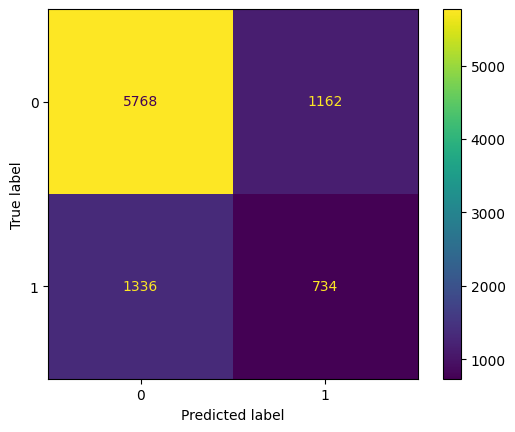

In [36]:
ConfusionMatrixDisplay(results).plot()

Evaluate and Cross-Validate

In [37]:
metrics = evaluation.evalMetrics(results)
print(f'The Accuracy of the Model: {round(metrics.accuracy(),3)}')
print(f'The Precision of the Model: {round(metrics.precision(),2)}')
print(f'The Recall of the Model: {round(metrics.recall(),2)}')
print(f'The F-Score of the Model: {round(metrics.fScore(),2)}')
print(f'The Negative Predictive Value  of the Model: {round(metrics.negativePredictiveValue(),2)}')
print(f'The Positive Predicitive Value of the Model: {round(metrics.positivePredictiveValue(),2)}')

The Accuracy of the Model: 0.722
The Precision of the Model: 0.81
The Recall of the Model: 0.83
The F-Score of the Model: 0.82
The Negative Predictive Value  of the Model: 0.39
The Positive Predicitive Value of the Model: 0.81


In [38]:
start = time.time()
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=28)
cv_scores = cross_val_score(model, data_levels[selected_features], data_levels['default_payment_next_month'], scoring='accuracy', cv=cv)
end = time.time()
print(f'Cross Validation took {round(end - start, 2)} seconds and produced an average accuracy of {round(mean(cv_scores),3)}')

Cross Validation took 4.81 seconds and produced an average accuracy of 0.738
